**Importing Libraries**

In [26]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import math
import sklearn
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def Hamming_Distance(image_scaled,template_scaled):
  #Padding the image to take care of boundaries 
  image_padded = np.zeros(shape=(image_scaled.shape[0] + template_scaled.shape[0] - 1, image_scaled.shape[1] + template_scaled.shape[1] -1))
  image_padded[:image_scaled.shape[0], :image_scaled.shape[1]] = image_scaled

  #Calculating Hamming distance now for template matching
  f_ij = np.zeros((image_scaled.shape[0],image_scaled.shape[1]))
  for i in range(image_scaled.shape[0]):
    for j in range(image_scaled.shape[1]):
      patch = image_padded[i:template_scaled.shape[0]+i,j:template_scaled.shape[1]+j]
      #Applying the formula given in the assignment
      f_ij[i,j] = np.sum(np.multiply(patch,template_scaled)) + np.sum(np.multiply((1-patch),(1-template_scaled)))

  f_ij_scaled = 255*(f_ij - f_ij.min())/(f_ij.max() - f_ij.min())      
  f_ij_scaled = f_ij_scaled.astype(np.uint8)
  return(f_ij_scaled)


In [3]:
def template_matching(img_path,template_cutoff):
  #template_paths = [i[0] for i in template_cutoff]
  cutoffs = [i[1] for i in template_cutoff]
  image_scaled = minmax_scale(np.array(Image.open(img_path,mode="r").convert('L')))
  templates_scaled = [minmax_scale(np.array(Image.open(template_cutoff[i][0],mode="r").convert('L'))) for i in range(len(template_cutoff))]

  f_ijs = [Hamming_Distance(image_scaled,templates_scaled[i]) for i in range(len(templates_scaled))]
  images = [Image.fromarray(np.where(f_ijs[i] > cutoffs[i],255,0).astype(np.uint8))  for i in range(len(f_ijs))]
  return(images)


In [4]:
image_path = '/content/drive/MyDrive/CVAssignment1/images_and_sample-code/test-images/music1.png'
template1_path = '/content/drive/MyDrive/CVAssignment1/images_and_sample-code/test-images/template1.png'
template2_path = '/content/drive/MyDrive/CVAssignment1/images_and_sample-code/test-images/template2.png'
template3_path = '/content/drive/MyDrive/CVAssignment1/images_and_sample-code/test-images/template3.png'
template_cutoff = [(template1_path,230),(template2_path,250),(template3_path,250)]

In [5]:
images = template_matching(image_path,template_cutoff)

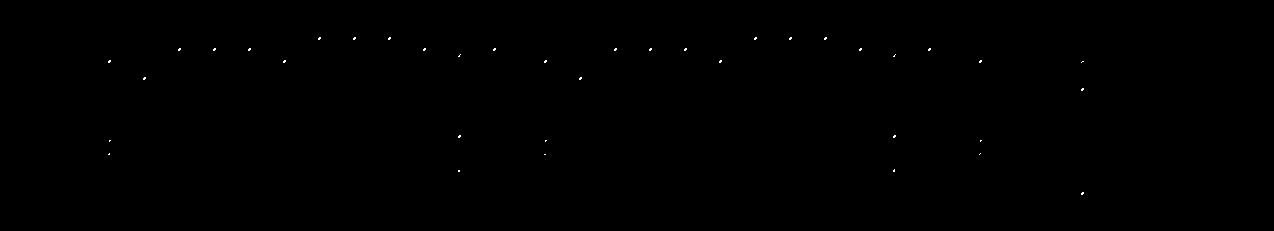

In [7]:
images[0]

In [8]:
#from math import sqrt 
def calc_distance(p1, p2): 
  return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2) 

**Parameters that will be given by Sahil's Code**

In [69]:
row_coordinate_treble_stave = 30
spacing_parameter = 12
row_coordinate_base_stave = 151
spacing_parameter = spacing_parameter/2

**Pre-Defining the notes for each row coordinate using parameters from Sahil's code**

In [13]:
treble_notes = ['F','D','B','G','E']
base_notes = ['A','F','D','B','G']
list_notes = []
for x in enumerate(range(row_coordinate_treble_stave,row_coordinate_treble_stave+5*spacing_parameter,spacing_parameter)):
  list_notes.append((x[1],treble_notes[x[0]]))

for x in enumerate(range(row_coordinate_base_stave,row_coordinate_base_stave+5*spacing_parameter,spacing_parameter)):
  list_notes.append((x[1],base_notes[x[0]]))

print(list_notes)

[(30, 'F'), (42, 'D'), (54, 'B'), (66, 'G'), (78, 'E'), (151, 'A'), (163, 'F'), (175, 'D'), (187, 'B'), (199, 'G')]


In [14]:
list_coordinates = [a_tuple[0] for a_tuple in list_notes]
print(list_coordinates)

[30, 42, 54, 66, 78, 151, 163, 175, 187, 199]


In [108]:
def return_notes(list_coordinates, k):
  if k > list_coordinates[0] - spacing_parameter and k <=list_coordinates[0]+spacing_parameter:
    text = 'F'
    return(text)
  elif k > list_coordinates[1] - spacing_parameter and k <=list_coordinates[1]+spacing_parameter:
    text = 'D'
    return(text)

  elif k > list_coordinates[2] - spacing_parameter and k <=list_coordinates[2]+spacing_parameter:
    text = 'B'
    return(text)

  elif k > list_coordinates[3] - spacing_parameter and k <=list_coordinates[3]+spacing_parameter:
    text = 'G'
    return(text)

  elif k > list_coordinates[4] - spacing_parameter and k <=list_coordinates[4]+spacing_parameter:
    text = 'E'
    return(text)

  elif k > list_coordinates[5] - spacing_parameter and k <=list_coordinates[5]+spacing_parameter:
    text = 'A'
    return(text)
  
  elif k > list_coordinates[6] - spacing_parameter and k <=list_coordinates[6]+spacing_parameter:
    text = 'F'
    return(text)

  elif k > list_coordinates[7] - spacing_parameter and k <=list_coordinates[7]+spacing_parameter:
    text = 'D'
    return(text)

  elif k > list_coordinates[8] - spacing_parameter and k <=list_coordinates[8]+spacing_parameter:
    text = 'B'
    return(text)

  elif k > list_coordinates[8] - spacing_parameter and k <=list_coordinates[8]+spacing_parameter:
    text = 'G'
    return(text)

  else:
    text = ''
    return(text)

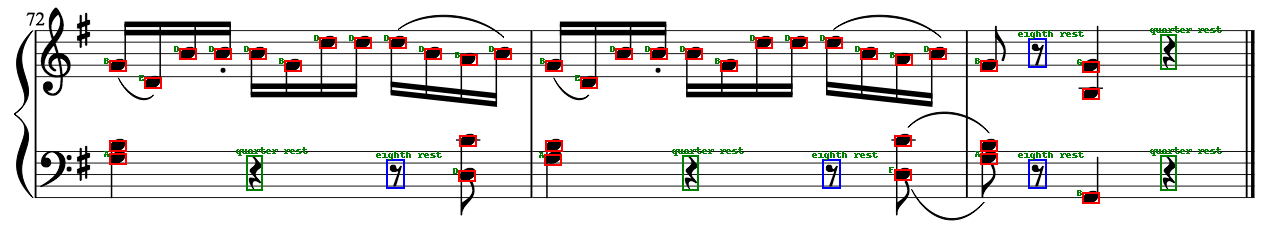

In [107]:
colors = ['red','green','blue']
convert_image = Image.open(image_path).convert('L')
im1 = convert_image.convert('RGB')
draw = ImageDraw.Draw(im1)
colors = ['red','green','blue']
coordinates = [(0,0)]
for k in range(len(images)):
  path = template_cutoff[k][0]
  temp_array_1 = np.array(Image.open(path,mode="r").convert('L'))
  temp = np.array(images[k])
  for i in range(temp.shape[0]):
    for j in range(temp.shape[1]):
      if temp[i,j] == 255:

        #Calculating distance of detected point with already detected point
        distance = np.sort([calc_distance((i,j),(m)) for m in coordinates])[0]

        #Will draw rectangle only if distance >5. This avoids multiple detections around the same point
        if distance >5:
          coordinates.append((i,j))
          x = i
          y = j

          #Function to determine the note for the given coordinate detected. DEFINED ABOVE THIS CELL
          text = return_notes(list_coordinates,x)
          
          x2 = x + temp_array_1.shape[0]
          y2 = y + temp_array_1.shape[1]
          draw.rectangle(((y,x),(y2,x2)), outline= colors[k] ,width=2)
          if k ==0:
            draw.text((y-5,x-5), text, fill='green')
          elif k ==1:
            draw.text((y-10,x-10), 'quarter rest', fill='green')
          elif k ==2:
            draw.text((y-10,x-10), 'eighth rest', fill='green')
im1

**Sahil's code with added function to calculate coordinates**

In [21]:
image_path = '/content/drive/MyDrive/CVAssignment1/images_and_sample-code/test-images/music1.png'

(231, 46)


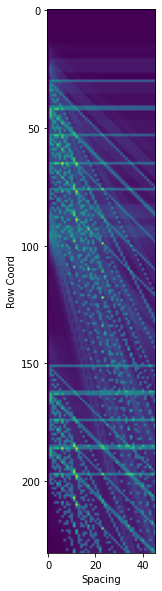

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image
import math
def hough_transform(image):
	note_image = Image.open(image).convert('L')
	axis0_accum = note_image.height
	#the space to explore and vote for each black pixel in the black n' whitye grayscale image
	axis1_accum = math.floor(note_image.height / 5)
	accumulator = np.zeros([axis0_accum, axis1_accum])
	print(accumulator.shape)
	# all pixels lower than this value will be considered as black pixels, hopefully belonging to the lines of the staff.
	pixel_threshold = 180
	# for groups of five lines on a staff
	lines_to_detect = 5

	for x in range(0,note_image.width):
		for y in range(0,note_image.height):
			pixel_val = note_image.getpixel((x,y))
			if pixel_val < pixel_threshold:
				for hough_axis1 in range(1, axis1_accum):
					for space in range(0,lines_to_detect):
						# following the format y = m*x + b where y is y-coord, x is x-coord, 
						# m is slope and b is bias. x and y are in image space, while m and b are in hough space
						# to detect five lines groups, we subsitute b with row coordinate of the first stave line
						# and m by the spacing between the lines
						hough_axis0 = abs(space * hough_axis1 + y)
						# ignore values if they exceed the image height, i.e., dim 0 of accumulator array
						if hough_axis0 < axis0_accum:
							accumulator[hough_axis0, hough_axis1] += 1

	return accumulator

accumulator = hough_transform(image_path)

def plot_hough_transform_space(accumulator):
    plt.figure(figsize=(5,10))
    plt.imshow(accumulator)
    plt.xlabel('Spacing')
    plt.ylabel('Row Coord')
    plt.savefig('hough_transform_space.png')

plot_hough_transform_space(accumulator)

In [23]:
def get_coordinates_spacing(accumulator):
  lst = []
  for i in range(accumulator.shape[0]):
    numbers = [accumulator[i,j] for j in range(accumulator.shape[1])]
    lst.append((i,np.round(np.mean(numbers),2)))
  lst.sort(key=lambda x:x[1],reverse=True)
  lst1 = lst[0:100]
  lst1.sort(key=lambda x:x[0],reverse=False)
  candidate_indices = []
  var = 0.3*lst1[0][1]
  for k in range(len(lst1)):
    diff = np.abs(lst1[k][1] - lst1[0][1])
    if (diff < var or (lst1[k][1] > lst1[0][1])):
      candidate_indices.append(k)
    
  lst2 = [lst1[i] for i in candidate_indices]
  indx = [lst2[k][0] for k in range(len(lst2))]
  sub =  np.diff(indx)
  condition = sub > 5
  condition = np.insert(condition,0,True)
  final_indxs = []
  for m in range(len(indx)):
    if condition[m] == True:
      final_indxs.append(m)
  lst3 = [lst2[i] for i in final_indxs]
  temp_lst = [lst3[k][0] for k in range(len(lst3))]
  sub =  np.diff(temp_lst)
  indexx = np.argmax(sub)+1
  treble_stave = lst3[0][0]
  print(f'Treble Stave Starting Coordinate: {treble_stave}')
  base_stave = lst3[indexx][0]
  print(f'Base Stave Starting Coordinate: {base_stave}')
  c = Counter(sub)
  spacing_parameter = [c.most_common(2)[k][0] for k in range(2)]
  spacing_parameter = [k for k in spacing_parameter if k%2 == 0][0]
  print(f'Spacing Parameter:{spacing_parameter}')
  return(treble_stave,base_stave,spacing_parameter)


In [27]:
get_coordinates_spacing(accumulator)

Treble Stave Starting Coordinate: 30
Base Stave Starting Coordinate: 151
Spacing Parameter:12


(30, 151, 12)

**Debugging from here on**

In [582]:
lst = []
for i in range(accumulator.shape[0]):
  numbers = [accumulator[i,j] for j in range(accumulator.shape[1])]
  lst.append((i,np.round(np.mean(numbers),2)))

lst

[(0, 103.62),
 (1, 122.76),
 (2, 98.13),
 (3, 80.28),
 (4, 70.07),
 (5, 66.74),
 (6, 61.14),
 (7, 55.54),
 (8, 53.64),
 (9, 85.75),
 (10, 127.29),
 (11, 141.96),
 (12, 164.13),
 (13, 166.53),
 (14, 129.12),
 (15, 117.49),
 (16, 116.42),
 (17, 111.5),
 (18, 105.37),
 (19, 101.47),
 (20, 106.32),
 (21, 131.71),
 (22, 138.29),
 (23, 130.64),
 (24, 145.37),
 (25, 156.96),
 (26, 164.64),
 (27, 183.45),
 (28, 194.07),
 (29, 194.43),
 (30, 193.83),
 (31, 194.34),
 (32, 194.67),
 (33, 188.7),
 (34, 222.8),
 (35, 222.74),
 (36, 226.29),
 (37, 233.18),
 (38, 220.55),
 (39, 223.93),
 (40, 252.97),
 (41, 270.75),
 (42, 284.72),
 (43, 294.55),
 (44, 305.29),
 (45, 323.09),
 (46, 381.97),
 (47, 423.46),
 (48, 459.2),
 (49, 478.91),
 (50, 492.08),
 (51, 502.5),
 (52, 539.92),
 (53, 583.75),
 (54, 603.04),
 (55, 601.47),
 (56, 557.43),
 (57, 513.72),
 (58, 526.18),
 (59, 548.42),
 (60, 578.29),
 (61, 563.86),
 (62, 562.25),
 (63, 579.34),
 (64, 663.36),
 (65, 780.36),
 (66, 912.66),
 (67, 925.01),
 (6

In [583]:
lst.sort(key=lambda x:x[1],reverse=True)
print(lst)

#lst1 = lst[0:100]

[(130, 2544.07), (274, 2504.3), (275, 2482.38), (129, 2479.67), (262, 2449.55), (117, 2407.66), (263, 2381.0), (249, 2360.24), (250, 2352.29), (118, 2330.91), (237, 2283.72), (104, 2208.61), (224, 2195.42), (116, 2157.88), (225, 2147.22), (105, 2135.76), (276, 2007.66), (92, 2005.29), (236, 1999.03), (128, 1956.91), (238, 1954.91), (103, 1914.29), (91, 1833.16), (79, 1818.12), (261, 1803.87), (131, 1714.25), (298, 1692.22), (80, 1668.96), (297, 1668.57), (296, 1664.79), (251, 1662.83), (264, 1641.7), (273, 1626.67), (248, 1618.21), (223, 1551.59), (119, 1549.0), (106, 1525.0), (78, 1508.36), (115, 1500.64), (295, 1471.3), (120, 1465.12), (112, 1438.28), (109, 1436.17), (121, 1434.21), (111, 1433.67), (124, 1432.14), (114, 1431.38), (113, 1431.22), (108, 1430.5), (122, 1430.18), (93, 1429.68), (107, 1425.74), (123, 1424.7), (132, 1420.41), (110, 1411.91), (142, 1410.36), (127, 1406.33), (136, 1404.84), (140, 1401.96), (134, 1399.26), (133, 1399.24), (226, 1394.32), (141, 1393.16), (138,

In [584]:
lst1= [t for t in lst if t[1]>1000]

In [585]:
lst1.sort(key=lambda x:x[0],reverse=False)
print(lst1)
candidate_indices = []
var = 0.2*lst1[0][1]
print(var)

[(78, 1508.36), (79, 1818.12), (80, 1668.96), (90, 1316.22), (91, 1833.16), (92, 2005.29), (93, 1429.68), (94, 1160.86), (95, 1193.3), (96, 1214.99), (97, 1237.42), (98, 1219.93), (99, 1247.25), (100, 1220.16), (101, 1245.59), (102, 1293.45), (103, 1914.29), (104, 2208.61), (105, 2135.76), (106, 1525.0), (107, 1425.74), (108, 1430.5), (109, 1436.17), (110, 1411.91), (111, 1433.67), (112, 1438.28), (113, 1431.22), (114, 1431.38), (115, 1500.64), (116, 2157.88), (117, 2407.66), (118, 2330.91), (119, 1549.0), (120, 1465.12), (121, 1434.21), (122, 1430.18), (123, 1424.7), (124, 1432.14), (125, 1390.42), (126, 1382.26), (127, 1406.33), (128, 1956.91), (129, 2479.67), (130, 2544.07), (131, 1714.25), (132, 1420.41), (133, 1399.24), (134, 1399.26), (135, 1374.46), (136, 1404.84), (137, 1380.99), (138, 1391.16), (139, 1380.79), (140, 1401.96), (141, 1393.16), (142, 1410.36), (143, 1363.18), (144, 1381.75), (145, 1357.86), (146, 1353.22), (147, 1322.57), (148, 1341.91), (149, 1310.68), (150, 130

In [586]:
treble_stave= lst1[0][0]
treble_stave

78

In [524]:
lst2 = lst1
lst2

[(55, 1214.68),
 (56, 1491.29),
 (57, 1724.19),
 (58, 1447.39),
 (71, 1022.52),
 (72, 1780.89),
 (73, 1915.06),
 (74, 2010.33),
 (75, 1439.35),
 (76, 1015.42),
 (88, 1805.53),
 (89, 2036.0),
 (90, 2171.08),
 (91, 2303.85),
 (92, 1371.78),
 (93, 1255.41),
 (94, 1184.05),
 (95, 1126.29),
 (96, 1116.0),
 (97, 1154.01),
 (98, 1143.73),
 (99, 1154.37),
 (100, 1155.58),
 (101, 1124.8),
 (102, 1104.28),
 (103, 1138.72),
 (104, 1485.16),
 (105, 2214.73),
 (106, 2397.1),
 (107, 2562.99),
 (108, 2207.63),
 (109, 1747.42),
 (110, 1594.16),
 (111, 1531.23),
 (112, 1447.99),
 (113, 1444.34),
 (114, 1448.49),
 (115, 1482.1),
 (116, 1482.62),
 (117, 1488.81),
 (118, 1490.22),
 (119, 1492.67),
 (120, 1486.57),
 (121, 1818.08),
 (122, 2672.68),
 (123, 2792.33),
 (124, 2874.18),
 (125, 2548.38),
 (126, 1963.24),
 (127, 1791.14),
 (128, 1734.85),
 (129, 1727.1),
 (130, 1729.43),
 (131, 1753.61),
 (132, 1771.47),
 (133, 1813.99),
 (134, 1860.94),
 (135, 1910.87),
 (136, 1970.22),
 (137, 2132.96),
 (138, 2

In [526]:
lst2

[(55, 1214.68),
 (56, 1491.29),
 (57, 1724.19),
 (58, 1447.39),
 (71, 1022.52),
 (72, 1780.89),
 (73, 1915.06),
 (74, 2010.33),
 (75, 1439.35),
 (76, 1015.42),
 (88, 1805.53),
 (89, 2036.0),
 (90, 2171.08),
 (91, 2303.85),
 (92, 1371.78),
 (93, 1255.41),
 (94, 1184.05),
 (95, 1126.29),
 (96, 1116.0),
 (97, 1154.01),
 (98, 1143.73),
 (99, 1154.37),
 (100, 1155.58),
 (101, 1124.8),
 (102, 1104.28),
 (103, 1138.72),
 (104, 1485.16),
 (105, 2214.73),
 (106, 2397.1),
 (107, 2562.99),
 (108, 2207.63),
 (109, 1747.42),
 (110, 1594.16),
 (111, 1531.23),
 (112, 1447.99),
 (113, 1444.34),
 (114, 1448.49),
 (115, 1482.1),
 (116, 1482.62),
 (117, 1488.81),
 (118, 1490.22),
 (119, 1492.67),
 (120, 1486.57),
 (121, 1818.08),
 (122, 2672.68),
 (123, 2792.33),
 (124, 2874.18),
 (125, 2548.38),
 (126, 1963.24),
 (127, 1791.14),
 (128, 1734.85),
 (129, 1727.1),
 (130, 1729.43),
 (131, 1753.61),
 (132, 1771.47),
 (133, 1813.99),
 (134, 1860.94),
 (135, 1910.87),
 (136, 1970.22),
 (137, 2132.96),
 (138, 2

In [587]:
indx = [lst2[k][0] for k in range(len(lst2))]
indx
sub =  np.diff(indx)
sub

array([ 1,  1,  1, 13,  1,  1,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [528]:
condition = sub > 5
condition = np.insert(condition,0,True)
condition

array([ True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [588]:
final_indxs = []
for m in range(len(indx)):
  if condition[m] == True:
    final_indxs.append(m)
lst3 = [lst2[i] for i in final_indxs]
temp_lst = [lst3[k][0] for k in range(len(lst3))]
temp_lst

[55, 71, 88]

In [589]:
sub =  np.diff(temp_lst)
indexx = np.argmax(sub)+1
treble_stave = lst3[0][0]
treble_stave
c = Counter(sub)
spacing_parameter = [c.most_common(2)[k][0] for k in range(2)]
spacing_parameter = [k for k in spacing_parameter if k%2 == 0][0]
print(f'Spacing Parameter:{spacing_parameter}')

Spacing Parameter:16


In [366]:
sub =  np.diff(temp_lst)
indexx = np.argmax(sub)+1
treble_stave = lst3[0][0]
print(f'Treble Stave Starting Coordinate: {treble_stave}')
base_stave = lst3[indexx][0]
print(f'Base Stave Starting Coordinate: {base_stave}')
c = Counter(sub)
spacing_parameter = [c.most_common(2)[k][0] for k in range(2)]
spacing_parameter = [k for k in spacing_parameter if k%2 == 0][0]
print(f'Spacing Parameter:{spacing_parameter}')

Treble Stave Starting Coordinate: 55
Base Stave Starting Coordinate: 88
Spacing Parameter:16


In [329]:
get_coordinates_spacing(accumulator)

Treble Stave Starting Coordinate: 90
Base Stave Starting Coordinate: 266
Spacing Parameter:16


(90, 266, 16)

(231, 46)
6
[65, 186, 59, 48, 54, 71, 53, 77, 42, 169, 175, 180, 174, 163, 192, 197, 198, 203, 209, 94, 100, 88, 66, 47, 76, 83, 60, 89, 82, 41, 36, 181, 185, 168, 187, 191, 30, 157, 162, 151, 204, 210, 215, 221, 99, 93, 101, 95, 105, 98]
row coordinate of trebel 65 and row coordinate of bass stave 186 with spacing 6


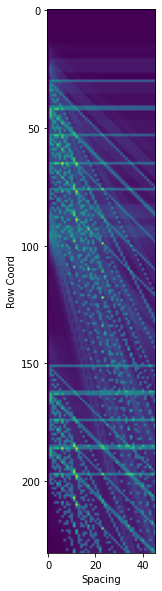

In [19]:
note_image = image_path
space, trebel_stave, bass_stave = generate_spacing_coords_hough(note_image)